In [ ]:
#import statements for all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#make your plot outputs appear and be stored within the notebook.
import sklearn
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
#import bank data as a dataframe
bank_data = pd.read_csv("bank.csv")

In [ ]:
#get basic information about the bank data i.e column names
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15111 entries, 0 to 15110
Data columns (total 17 columns):
age           15111 non-null int64
job           15042 non-null object
marital       15099 non-null object
education     15080 non-null object
default       15060 non-null object
balance       15110 non-null float64
housing       15096 non-null object
loan          15111 non-null object
contact       15081 non-null object
day           14988 non-null float64
month         14999 non-null object
duration      15111 non-null int64
campaign      15111 non-null int64
pdays         15091 non-null float64
previous      15111 non-null int64
poutcome      15111 non-null object
subscribed    15111 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 2.0+ MB


In [ ]:
#view the first few rows of the data
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198,1,-1.0,0,unknown,no


In [ ]:
#drop any duplicates in the data
bank_data = bank_data.drop_duplicates()

In [ ]:
bank_data.shape

(15111, 17)

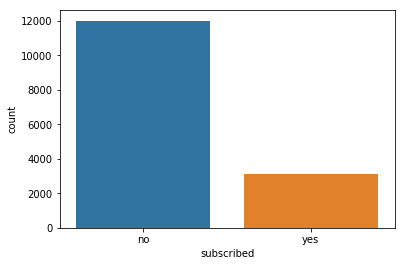

In [ ]:
#distribution of subscribed plot
sns_plot =sns.countplot(x='subscribed',data=bank_data)
plt.savefig('subdistribution.png')

In [ ]:
#Count distribution of subscribed
bank_data['subscribed'].value_counts()

no     12005
yes     3106
Name: subscribed, dtype: int64

In [ ]:
#percentage distribution of subscribed
bank_data['subscribed'].value_counts()/bank_data['subscribed'].count()

no     0.794454
yes    0.205546
Name: subscribed, dtype: float64

##  Data Exploration Phase

######  Exploring categorical variables

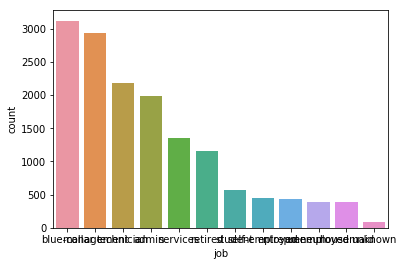

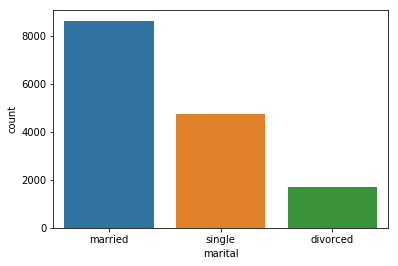

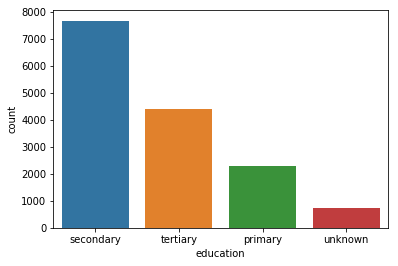

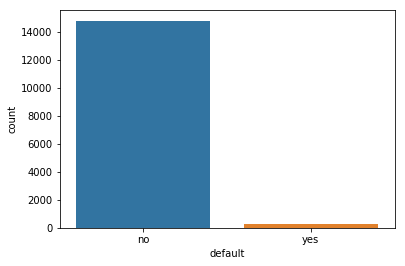

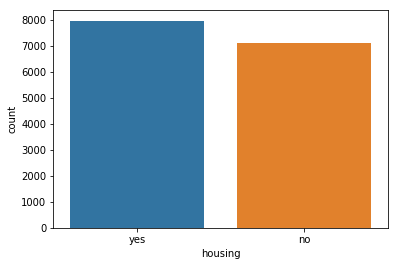

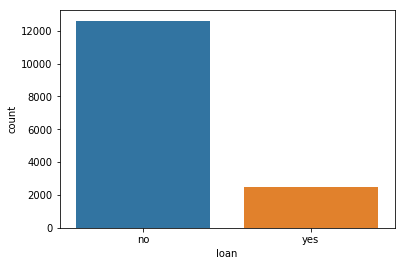

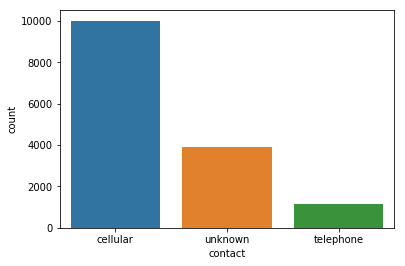

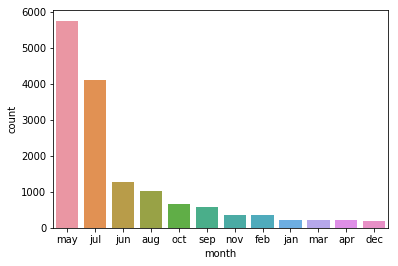

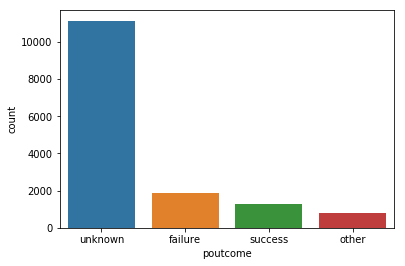

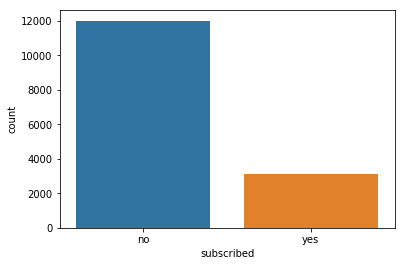

In [ ]:
#Bar plots of categorical features
for feature in bank_data.dtypes[bank_data.dtypes == 'object'].index:
    sns.countplot(x=feature, data=bank_data, order = bank_data[feature].value_counts().index)
    plt.show()

In [ ]:
bank_data['month'].value_counts()/bank_data['month'].count()

may    0.384092
jul    0.274818
jun    0.084872
aug    0.068671
oct    0.043736
sep    0.038603
nov    0.024535
feb    0.023335
jan    0.015068
mar    0.014601
apr    0.014268
dec    0.013401
Name: month, dtype: float64

In [ ]:
bank_data['housing'].value_counts()/bank_data['loan'].count()

yes    0.527827
no     0.471180
Name: housing, dtype: float64

In [ ]:
bank_data['default'].value_counts()/bank_data['default'].count()

no     0.983665
yes    0.016335
Name: default, dtype: float64

In [ ]:
bank_data['contact'].value_counts()/bank_data['contact'].count()

cellular     0.664280
unknown      0.259996
telephone    0.075724
Name: contact, dtype: float64

In [ ]:
bank_data['loan'].value_counts()/bank_data['loan'].count()

no     0.834558
yes    0.165442
Name: loan, dtype: float64

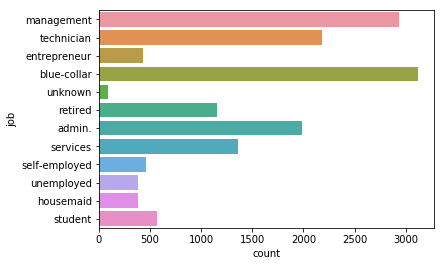

In [ ]:
sns_plot = sns.countplot(y='job', data=bank_data)
plt.savefig('jobdistribution.png')

###### Exploring Numerical variables

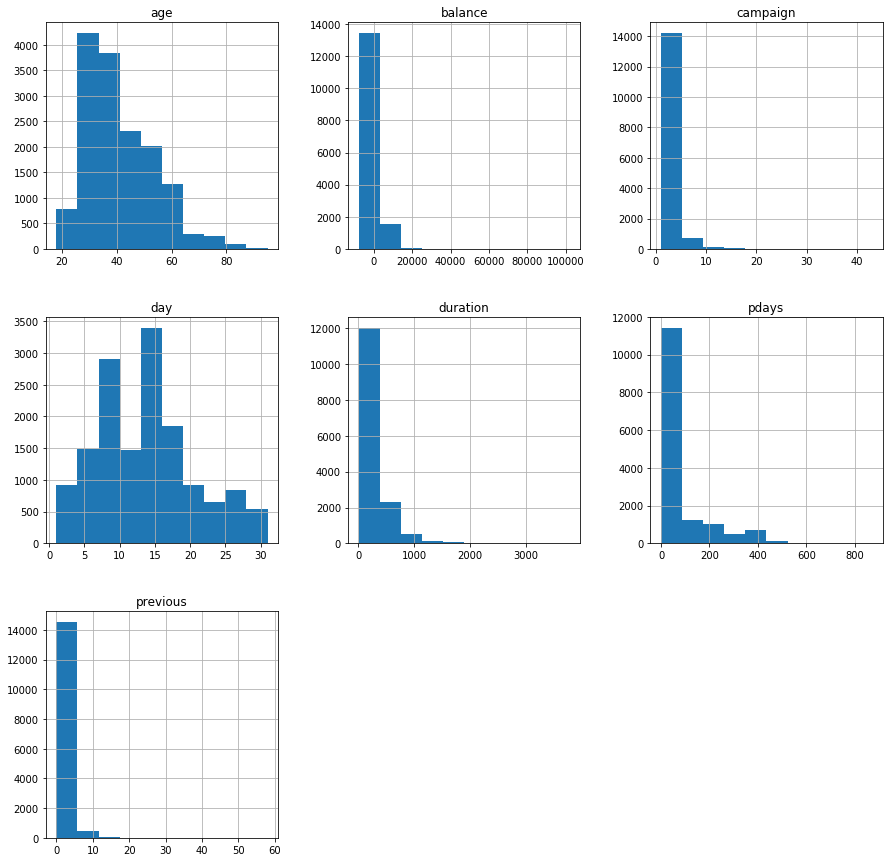

In [ ]:
#Histogram grid
bank_data.hist(figsize=(15,15))
plt.show()

In [ ]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,15111.000000,15110.000000,14988.000000,15111.000000,15111.000000,15091.000000,15111.000000
mean,41.050758,1277.701059,13.337737,268.274701,2.284495,56.443509,0.872742
std,12.411636,3133.371164,6.926510,252.733311,2.155380,117.966131,2.334109
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,70.000000,8.000000,115.000000,1.000000,-1.000000,0.000000
50%,38.000000,393.000000,13.000000,195.000000,2.000000,-1.000000,0.000000
75%,49.000000,1326.000000,18.000000,333.000000,3.000000,78.000000,1.000000
max,95.000000,102127.000000,31.000000,3785.000000,43.000000,871.000000,58.000000


#### Handling outliers

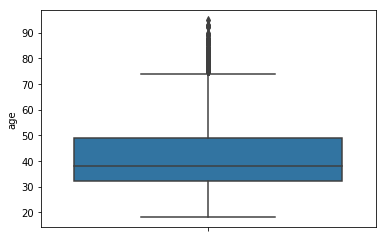

In [ ]:
plot = sns.boxplot(y=bank_data["age"])

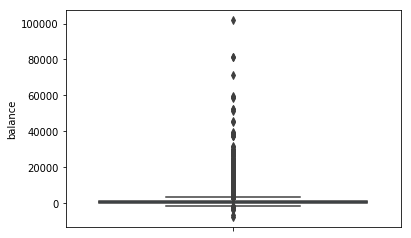

In [ ]:
plot = sns.boxplot(y=bank_data["balance"])

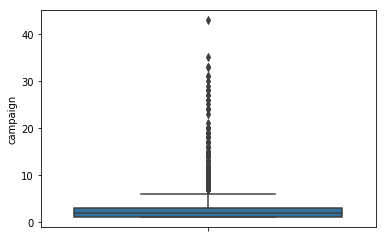

In [ ]:
plot = sns.boxplot(y=bank_data["campaign"])

#### Handling Missing values

In [ ]:
#count missing values
bank_data.isnull().sum()

age             0
job            69
marital        12
education      31
default        51
balance         1
housing        15
loan            0
contact        30
day           123
month         112
duration        0
campaign        0
pdays          20
previous        0
poutcome        0
subscribed      0
dtype: int64

In [ ]:
#drop missing values
bank_data = bank_data.dropna()

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14819 entries, 0 to 15110
Data columns (total 17 columns):
age           14819 non-null int64
job           14819 non-null object
marital       14819 non-null object
education     14819 non-null object
default       14819 non-null object
balance       14819 non-null float64
housing       14819 non-null object
loan          14819 non-null object
contact       14819 non-null object
day           14819 non-null float64
month         14819 non-null object
duration      14819 non-null int64
campaign      14819 non-null int64
pdays         14819 non-null float64
previous      14819 non-null int64
poutcome      14819 non-null object
subscribed    14819 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 2.0+ MB


In [ ]:
#percentage distribution of subscribed
bank_data['subscribed'].value_counts()/bank_data['subscribed'].count()

no     0.795465
yes    0.204535
Name: subscribed, dtype: float64

#### Handling invalid data

In [ ]:
#dropping unnown values in job aatribute
bank_data = bank_data[bank_data.job != 'unknown']

In [ ]:
#dropping unnown values in education attribute
bank_data = bank_data[bank_data.education != 'unknown']

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14058 entries, 0 to 15110
Data columns (total 17 columns):
age           14058 non-null int64
job           14058 non-null object
marital       14058 non-null object
education     14058 non-null object
default       14058 non-null object
balance       14058 non-null float64
housing       14058 non-null object
loan          14058 non-null object
contact       14058 non-null object
day           14058 non-null float64
month         14058 non-null object
duration      14058 non-null int64
campaign      14058 non-null int64
pdays         14058 non-null float64
previous      14058 non-null int64
poutcome      14058 non-null object
subscribed    14058 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 1.9+ MB


In [ ]:
#percentage distribution of subscribed
bank_data['subscribed'].value_counts()/bank_data['subscribed'].count()

no     0.797624
yes    0.202376
Name: subscribed, dtype: float64

In [ ]:
bank_data['subscribed'].value_counts()

no     11213
yes     2845
Name: subscribed, dtype: int64

#### Balancing data

In [ ]:
# Separate majority and minority classes
unsubscribed = bank_data[bank_data.subscribed=='no']
subscribed= bank_data[bank_data.subscribed=='yes']

In [ ]:
subscribed_upsampled = resample(subscribed, replace=True, n_samples=11213, random_state=0)

In [ ]:
upsampled_bankdata = pd.concat([unsubscribed, subscribed_upsampled])

In [ ]:
upsampled_bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5.0,may,139,1,-1.0,0,unknown,no
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5.0,may,217,1,-1.0,0,unknown,no


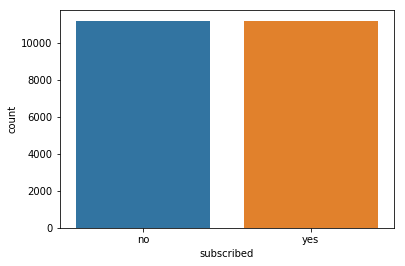

In [ ]:
sns_plot =sns.countplot(x='subscribed',data=upsampled_bankdata)
plt.savefig('upsampled.png')

In [ ]:
upsampled_bankdata['subscribed'].value_counts()

no     11213
yes    11213
Name: subscribed, dtype: int64

In [ ]:
data_copy = upsampled_bankdata.copy()

#### Handling Categorical Variables 

In [ ]:
# encoding the categorical variables
encoder = preprocessing.LabelEncoder()
upsampled_bankdata['job'] = encoder.fit_transform(upsampled_bankdata['job'])
upsampled_bankdata['marital'] = encoder.fit_transform(upsampled_bankdata['marital'])
upsampled_bankdata['education'] = encoder.fit_transform(upsampled_bankdata['education'])
upsampled_bankdata['default'] = encoder.fit_transform(upsampled_bankdata['default'])
upsampled_bankdata['housing'] = encoder.fit_transform(upsampled_bankdata['housing'])
upsampled_bankdata['loan'] = encoder.fit_transform(upsampled_bankdata['loan'])
upsampled_bankdata['poutcome'] = encoder.fit_transform(upsampled_bankdata['poutcome'])
upsampled_bankdata['subscribed'] = encoder.fit_transform(upsampled_bankdata['subscribed'])
upsampled_bankdata['contact'] = encoder.fit_transform(upsampled_bankdata['contact'])
upsampled_bankdata['month'] = encoder.fit_transform(upsampled_bankdata['month'])

In [ ]:
upsampled_bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,4,1,2,0,2143.0,1,0,2,5.0,8,261,1,-1.0,0,3,0
1,44,9,2,1,0,29.0,1,0,2,5.0,8,151,1,-1.0,0,3,0
2,33,2,1,1,0,2.0,1,1,2,5.0,8,76,1,-1.0,0,3,0
5,35,4,1,2,0,231.0,1,0,2,5.0,8,139,1,-1.0,0,3,0
6,28,4,2,2,0,447.0,1,1,2,5.0,8,217,1,-1.0,0,3,0


#### Feature selection

In [ ]:
#Deleting the 'default' column
del upsampled_bankdata['default']

In [ ]:
#Deleting the 'default' column
del upsampled_bankdata['contact']

In [ ]:
upsampled_bankdata.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,4,1,2,2143.0,1,0,5.0,8,261,1,-1.0,0,3,0
1,44,9,2,1,29.0,1,0,5.0,8,151,1,-1.0,0,3,0
2,33,2,1,1,2.0,1,1,5.0,8,76,1,-1.0,0,3,0
5,35,4,1,2,231.0,1,0,5.0,8,139,1,-1.0,0,3,0
6,28,4,2,2,447.0,1,1,5.0,8,217,1,-1.0,0,3,0


In [ ]:
X= upsampled_bankdata.iloc[:,0:14]
X[:]

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,2143.0,1,0,5.0,8,261,1,-1.0,0,3
1,44,9,2,1,29.0,1,0,5.0,8,151,1,-1.0,0,3
2,33,2,1,1,2.0,1,1,5.0,8,76,1,-1.0,0,3
5,35,4,1,2,231.0,1,0,5.0,8,139,1,-1.0,0,3
6,28,4,2,2,447.0,1,1,5.0,8,217,1,-1.0,0,3
7,42,2,0,2,2.0,1,0,5.0,8,380,1,-1.0,0,3
8,58,5,1,0,121.0,1,0,5.0,8,50,1,-1.0,0,3
9,43,9,2,1,593.0,1,0,5.0,8,55,1,-1.0,0,3
10,41,0,0,1,270.0,1,0,5.0,8,222,1,-1.0,0,3
11,29,0,2,1,390.0,1,0,5.0,8,137,1,-1.0,0,3


In [ ]:
y = upsampled_bankdata.iloc[:,14]
y[:]

0        0
1        0
2        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
14       0
15       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
        ..
8860     1
15082    1
13700    1
14290    1
13584    1
10784    1
13309    1
11482    1
5817     1
10234    1
6966     1
13436    1
10247    1
13639    1
5149     1
12682    1
2865     1
10223    1
14877    1
12911    1
15104    1
11431    1
13360    1
10314    1
12850    1
14196    1
8422     1
9295     1
6149     1
10040    1
Name: subscribed, Length: 22426, dtype: int64

#### Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, y_train.shape


((15698, 14), (15698,))

In [ ]:
X_test.shape, y_test.shape

((6728, 14), (6728,))

#### Training the Model

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
predictions = svc_model.predict(X_test)

#### Testing the Model

In [ ]:
print(confusion_matrix(y_test,predictions))

[[3383    0]
 [ 209 3136]]


In [ ]:
accuracy_score(y_test, predictions)

0.968935790725327

In [ ]:
accuracy_score(y_train, svc_model.predict(X_train))

1.0

In [ ]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3383
          1       1.00      0.94      0.97      3345

avg / total       0.97      0.97      0.97      6728

